# Section 6: Polynomial Regression

In contrast to linear regressions polynomial regression uses powers of the independent variables (e.g. x<sup>2</sup>, x<sup>3</sup>, x<sup>4</sup>, x<sup>5</sup>,...) to find a relationship between the independent and dependent variables.

## Step 1 Import and Prepare the data.

We'll use the template we created in Section 2 to import and preprocess the data.

In [16]:
import numpy as np # Libraries for fast linear algebra and array manipulation
import pandas as pd # Import and manage datasets
from plotly import __version__ as py__version__
import plotly.express as px # Libraries for ploting data
import plotly.graph_objects as go # Libraries for ploting data
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from sklearn import __version__ as skl__version__
from sklearn.linear_model import LinearRegression # Library for creating Linear Regression Models
from sklearn.preprocessing import PolynomialFeatures
from statsmodels import __version__ as statsmodels__version__
import statsmodels.api as sm

Library versions used in this code:

In [9]:
print('Numpy: ' + np.__version__)
print('Pandas: ' + pd.__version__)
print('Plotly: ' + py__version__)
print('Scikit-learn: ' + skl__version__)
print('Stats Models: ' + statsmodels__version__)

Numpy: 1.16.4
Pandas: 0.25.1
Plotly: 4.0.0
Scikit-learn: 0.21.2
Stats Models: 0.10.1


In [10]:
def LoadData():
    dataset = pd.read_csv('Position_Salaries.csv')
    return dataset

dataset = LoadData()
print(dataset.head(3))
print()
print(dataset.info())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


In this case the data we are analyzing is a list of positions at a company and the average salaries for those positions and trying we need to fit a model to them.

In [11]:
X = dataset.iloc[:,1:-1].values # All the columns except the last are features
y = dataset.iloc[:,-1].values # The last column is the dependent variable

Notes about the preprocessing:
* We skipped the following sections of preprocessing:
  * Missing Data - The dataset is complete with no missing data
  * Feature Scaling - The linear regression libraries used here do not require prescaled data
  * Splitting the data - Our dataset is very small and this analysis the most data available.

## Step 2: Fit a Polynomial Regression Model
*Note:* we are still using the LinearRegression class and adding the polynomial variable ourself

Start by fitting a simple linear regression that we will compare against the polynomial model.

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now use the PolynomialFeatures class to add the powers of the independent variable to the model.

In [36]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [37]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 3 Lets Compare

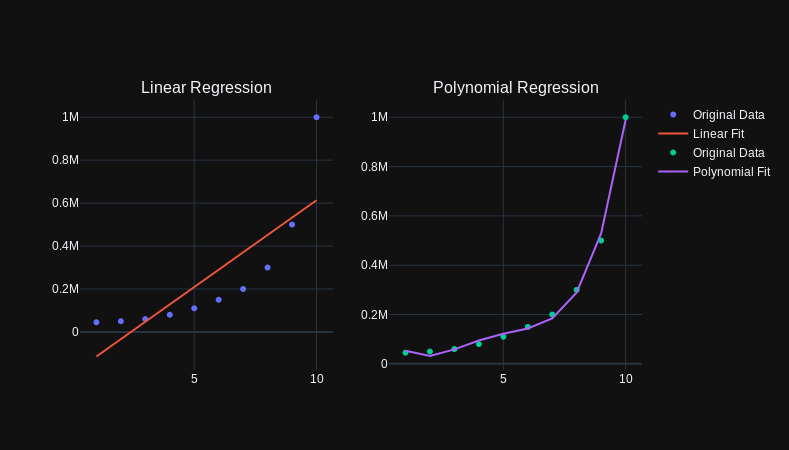

In [38]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ['Linear Regression', 'Polynomial Regression'])
fig.add_scatter(row = 1, col = 1, x = X.flatten(), y = y.flatten(), mode = 'markers', name = 'Original Data')
fig.add_scatter(row = 1, col = 1, x = X.flatten(), y = lin_reg.predict(X), mode = 'lines', name = 'Linear Fit')
fig.add_scatter(row = 1, col = 2, x = X.flatten(), y = y.flatten(), mode = 'markers', name = 'Original Data')
fig.add_scatter(row = 1, col = 2, x = X.flatten(), y = lin_reg_2.predict(X_poly), mode = 'lines', name = 'Polynomial Fit')